# Factor Analysis & Clustering

# <center> Batter </center>
<img src="https://www.ducksters.com/sports/baseball/hitter.jpg">

## Data importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
team_hit_2016 = pd.read_csv('team_hitter_scaling_2016.csv',index_col=0)
team_pit_2016 = pd.read_csv('team_pitcher_scaling_2016.csv',index_col=0)
team_hit_2016 = pd.merge(team_hit_2016,team_pit_2016[['G_ID','WLS','TB_SC']], on=['G_ID','TB_SC'])

Factor Analysis(FA)는 잠재변수를 찾는 방식이다. 잠재변수에 의해 X변수들이 결정된다고 가정한다. 순서는 다음과 같다.

1) **Choosing the Number of Factors**(Kaiser criterion & scree plot): <br>
고유값에 근거하여 적절한 요인의 개수를 판단 <br>
2) **Factor Analysis**: <br>
factor analysis를 통하여 factor가 어느 변수와 high factor loadings을 갖는지 살펴야함.

[참조](https://www.datacamp.com/community/tutorials/introduction-factor-analysis)

## Choosing the Number of Factors

In [3]:
features = ['RUN','P_HRA_RT','AVG','SLG','IsoP','OBP','OPS','RC','XR','wOBA','BABIP']
df = team_hit_2016.loc[:,features]
# Target y는 WLS로 설정한다.

In [4]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(df, 10, rotation='varimax')
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,5.817098e+00
1,2.942385e+00
2,1.096772e+00
3,6.167916e-01
4,3.007768e-01
5,1.051879e-01
6,9.986562e-02
7,1.378441e-02
8,7.338156e-03
9,1.627527e-15


Kaiser Criterion에 의하여 고유값이 1보다 큰 경우만 factor로 취급한다. <br>
따라서 이 경우에는 factor의 갯수를 3개로 두자.

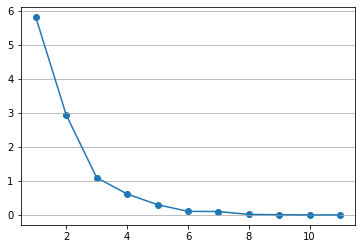

In [5]:
plt.scatter(range(1, df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.grid(axis='y')
plt.show() #Factor가 3개일때만 1을 넘는다. -> 

## Factor Analysis

In [6]:
fa.analyze(df, 3, rotation="varimax")
#각 loading 값들이 최대한 서로 다르게 하기위해 Varimax rotation 실행.

In [7]:
fa.loadings #factor loading = L, 이며 L은 factor간 선형결합의 weight를 의미함.
# L을 추정하는것이 중요한데 

,Factor1,Factor2,Factor3
RUN,0.077808,0.952707,0.065389
P_HRA_RT,0.062466,0.581165,0.023765
AVG,0.915420,0.097015,0.333502
SLG,0.529269,0.090509,0.829665
IsoP,0.140895,0.065781,0.987944
OBP,0.820440,0.112283,0.361162
OPS,0.683132,0.103050,0.724890
RC,0.086954,0.953603,0.071237
XR,0.088626,0.953898,0.085399
wOBA,0.747518,0.104598,0.639739


**F1(타율,출루계열)** : AVG, OBP, wOBA, BABIP <br>
AVG(타율), OBP(출루율), wOBA(가중 출루율), BABIP

**F2(득점계열)** : RUN, P_HRA_RT, RC, XR <br>
RUN(득점), P_HHA_RT(득점권타율), RC(득점기여도), XR(득점 공헌도)

**F3(장타율계열)** : SLG, IsoP, OPS <br>
SLG(장타율), IsoP(순장타율), ops(출루율+장타율)

In [8]:
fa.get_factor_variance()
# Total 86% cumulative Variance explained by the 3 factors.

,Factor1,Factor2,Factor3
SS Loadings,3.518986,3.126468,2.858742
Proportion Var,0.319908,0.284224,0.259886
Cumulative Var,0.319908,0.604132,0.864018


In [22]:
X = df.values
fa = FactorAnalysis(n_components=3)
X_fa = fa.fit_transform(X) # FA를 위해 E(X-mu)=0를 만들어주려고 mu를 빼주는듯?
df_fa =pd.DataFrame(data=X_fa, columns=['F1','F2','F3'])
df_fa['WLS'] = team_hit_2016['WLS']
df_fa['G_ID'] = team_hit_2016['G_ID']
df_fa['TB_SC'] = team_hit_2016['TB_SC']

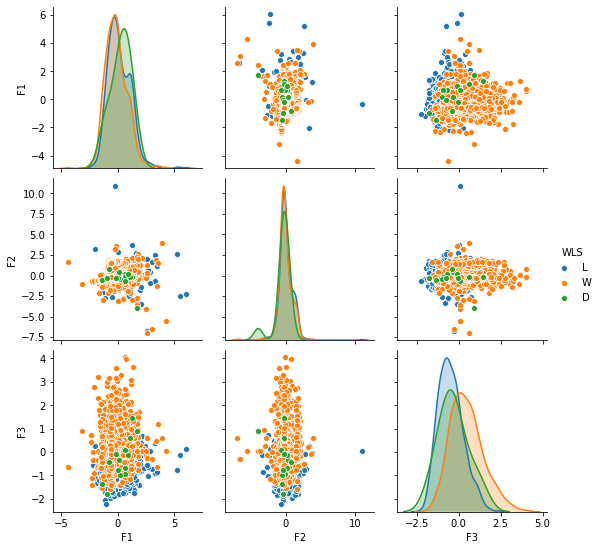

In [10]:
sns.pairplot(data=df_fa, hue='WLS')

In [47]:
from mpl_toolkits import mplot3d

In [96]:
from sklearn.cluster import KMeans

In [97]:
kmeans = KMeans(n_clusters=3).fit(df_fa[['F1','F2','F3']])

In [100]:
df_fa['cluster_id'] = kmeans.labels_

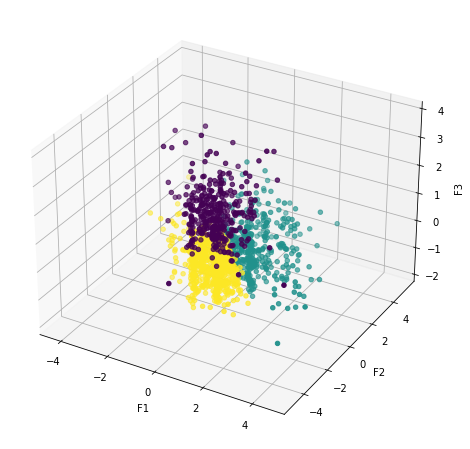

In [121]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df_fa['F1'],df_fa['F2'],df_fa['F3'],c=df_fa['cluster_id'])
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3',rotation=90)
plt.show()

In [84]:
X = np.array(df_fa[['F1','F2']])

In [70]:
predict.columns = ['predict']

In [71]:
df_c = pd.concat([df_c,predict],axis=1)

In [72]:
df_c['predict'].unique()

array([-1,  0,  1], dtype=int64)

# <center> Pitcher </center>
<img src="http://sportsgroundproduction.blob.core.windows.net/cms/14732/newsarticles/63254_wo.jpg" width="220">

In [11]:
team_pit_2016.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,OOPS,WHIP,BABIP,DICE,ERA,RA9,FIP,kFIP,HR/9,H/9
0,20160401HHLG0,20160401,LG,HH,0,B,0,W,0,36,...,0.652618,0.294171,0.361111,0.000000,0.375000,0.285714,0.000000,0.000000,0.000000,0.559211
1,20160401HHLG0,20160401,HH,LG,0,T,0,L,0,34,...,0.615942,0.047586,0.266667,0.264158,0.397059,0.424370,0.264158,0.324661,0.352941,0.171053
2,20160401HTNC0,20160401,NC,HT,0,B,0,W,0,27,...,0.727554,0.147085,0.304348,0.329193,0.500000,0.428571,0.329193,0.429487,0.444444,0.298246
3,20160401HTNC0,20160401,HT,NC,0,T,0,L,0,24,...,0.966667,0.845741,0.368421,0.847826,0.703125,0.660714,0.847826,1.000000,1.000000,0.615132
4,20160401KTSK0,20160401,SK,KT,0,B,0,L,0,27,...,0.853175,0.735427,0.321429,0.875776,1.000000,1.000000,0.875776,0.942308,0.888889,0.745614


In [12]:
features = ['R','ER','P_WHIP_RT','K/9','BB/9','K/BB','OAVG','OOBP','OSLG','OOPS','WHIP','BABIP','DICE',
                                               'ERA','RA9','FIP','kFIP','HR/9','H/9']
df = team_pit_2016.loc[:,features]

In [13]:
fa = FactorAnalyzer()
fa.analyze(df, 10, rotation='varimax')
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.076674e+01
1,2.495332e+00
2,2.269857e+00
3,1.455092e+00
4,1.071220e+00
5,4.891925e-01
6,2.103467e-01
7,1.006515e-01
8,5.165493e-02
9,4.110243e-02


<function matplotlib.pyplot.show(close=None, block=None)>

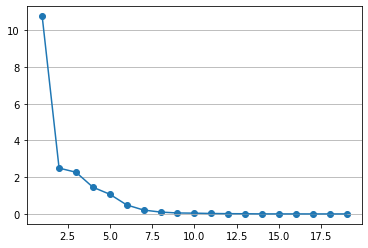

In [14]:
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1),ev)
plt.grid(axis='y')
plt.show # 4개 선택

In [15]:
fa = FactorAnalyzer()
fa.analyze(df, 4, rotation='varimax')
fa.loadings

,Factor1,Factor2,Factor3,Factor4
R,0.092618,0.084737,0.970259,0.026750
ER,0.087012,0.092220,0.969865,0.015046
P_WHIP_RT,0.015054,0.056321,0.617532,0.077854
K/9,-0.318749,-0.279693,0.018006,0.168571
BB/9,0.306014,0.049820,0.071565,0.958276
K/BB,-0.547522,-0.248502,-0.048560,-0.515618
OAVG,0.286590,0.950108,0.080329,0.051397
OOBP,0.365895,0.669575,0.106607,0.630400
OSLG,0.684225,0.678878,0.095199,-0.026865
OOPS,0.623199,0.732532,0.106869,0.212123


F1 : K/9, K/BB, OSLG, DICE, FIP, kFIP, HR/9
9이닝당 탈삼진개수, 볼삼비, 피장타율, 유사 평군자책점,
수비무관평균자책점, 한국프로야구의 수비무관평균자책점,
9이닝당 피홈런개수

F2 : OAVG, OOBP, OOPS, WHIP, BABIP, ERA, RA9, H/9
피안타율, 피출루율, 피OPS, 이닝 당 출루허용, 인플레이 타구 피안타율,
평균자책점, 9이닝당평균실점, 9이닝당 피안타개수

F3 : R, ER, P_WHIP_RT
실점, 자책점, 득점권WHIP

F4 : BB/9
9이닝당 볼넷개수

In [16]:
fa.get_factor_variance()
# Total 87% cumulative Variance explained by the 4 factors.

,Factor1,Factor2,Factor3,Factor4
SS Loadings,5.764750,5.503591,2.388449,2.869246
Proportion Var,0.303408,0.289663,0.125708,0.151013
Cumulative Var,0.303408,0.593071,0.718778,0.869791


In [25]:
X = df.values
fa = FactorAnalysis(n_components=4)
X_fa = fa.fit_transform(X) # FA를 위해 E(X-mu)=0를 만들어주려고 mu를 빼주는듯?
df2_fa =pd.DataFrame(data=X_fa, columns=['F1','F2','F3','F4'])
df2_fa['WLS'] = team_pit_2016['WLS']
df2_fa['G_ID'] = team_pit_2016['G_ID']
df2_fa['TB_SC'] = team_pit_2016['TB_SC']

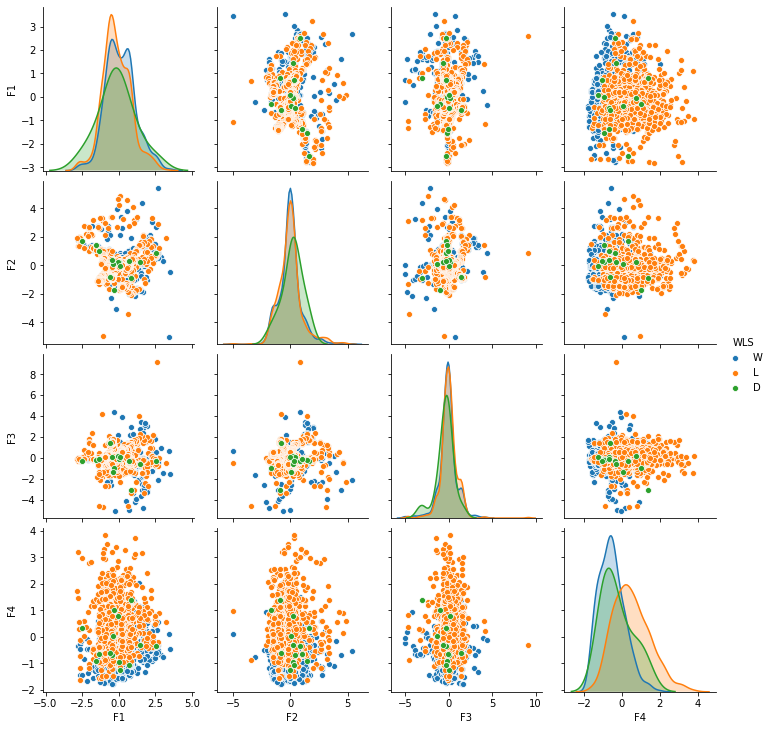

In [18]:
sns.pairplot(data=df2_fa, hue='WLS')

In [127]:
kmeans = KMeans(n_clusters=3).fit(df2_fa[['F1','F2','F3','F4']])
df2_fa['cluster_id'] = kmeans.labels_

In [130]:
test = pd.merge(df_fa,df2_fa, on=['G_ID','TB_SC','WLS'])

In [132]:
test['cluster_id_x'] = test['cluster_id_x']*2
test['cluster_id_y'] = test['cluster_id_y']*3
test['cluster_id'] = test['cluster_id_x']+test['cluster_id_y']

In [134]:
pd.crosstab(test['cluster_id'],test['WLS'])

WLS,D,L,W
cluster_id,,,
0,1,86,14
2,1,85,17
3,0,58,105
4,1,152,24
5,3,71,121
6,0,34,80
7,5,130,191
8,1,24,53
10,2,73,108
